In [1]:
## auto reload
%load_ext autoreload
%autoreload 2

## three cases
mlp_log_dir = "/home/molumitu/code/srpe/" + "logs/" + "srpe-20230406-170724/test"
ode_log_dir = "/home/molumitu/code/srpe/" + "logs/" + "srpe-20230417-155740/test"
ode3_log_dir = "/home/molumitu/code/srpe/" + "logs/" + "srpe-20230511-221203/test"
runs = [mlp_log_dir, ode_log_dir, ode3_log_dir]

In [2]:
## read all tensorboard events
event_list = []
import os
for run in runs:
    event_list += [os.path.join(run, i) for i in os.listdir(run) if i.startswith('events')]

In [3]:
event_list

['/home/molumitu/code/srpe/logs/srpe-20230406-170724/test/events.out.tfevents.1680772047.molumitu-MS-7C37',
 '/home/molumitu/code/srpe/logs/srpe-20230417-155740/test/events.out.tfevents.1681718273.molumitu-MS-7C37',
 '/home/molumitu/code/srpe/logs/srpe-20230511-221203/test/events.out.tfevents.1683814345.L236-3']

In [4]:
label_list = ['Max_error', 'Mean_error']
tags = {
    'Max_error': 'error/dist_max',
    'Mean_error': 'error/dist_mean',
}

In [5]:
from utils import get_event_data, get_data_frame, process_df, get_event_file_path_list
import pandas as pd

In [6]:
df_list = []
for event in event_list:
    data = get_event_data(event, label_list, 20000, tags)
    steps = [event.step for event in data['Max_error']]
    values_max_error = [event.value for event in data['Max_error']]
    df = pd.DataFrame({'step': steps, 'Max_error': values_max_error, 'Mean_error': [event.value for event in data['Mean_error']]})
    df = process_df(df, 'Max_error', 0, 20000)
    df = process_df(df, 'Mean_error', 0, 20000)
    df = pd.DataFrame({'step': df['step'], 'Max_error': df['Max_error_smooth'], 'Mean_error': df['Mean_error_smooth']})
    df_list.append(df)


In [7]:
len(data['Max_error'])

20000

/tmp/ipykernel_1615453/572462043.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.lineplot(data=df, x="step", y="Max_error", ax=ax, label=alg_list[i], errorbar=("se", 2), ci=95)
/tmp/ipykernel_1615453/572462043.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.lineplot(data=df, x="step", y="Max_error", ax=ax, label=alg_list[i], errorbar=("se", 2), ci=95)
/tmp/ipykernel_1615453/572462043.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.lineplot(data=df, x="step", y="Max_error", ax=ax, label=alg_list[i], errorbar=("se", 2), ci=95)


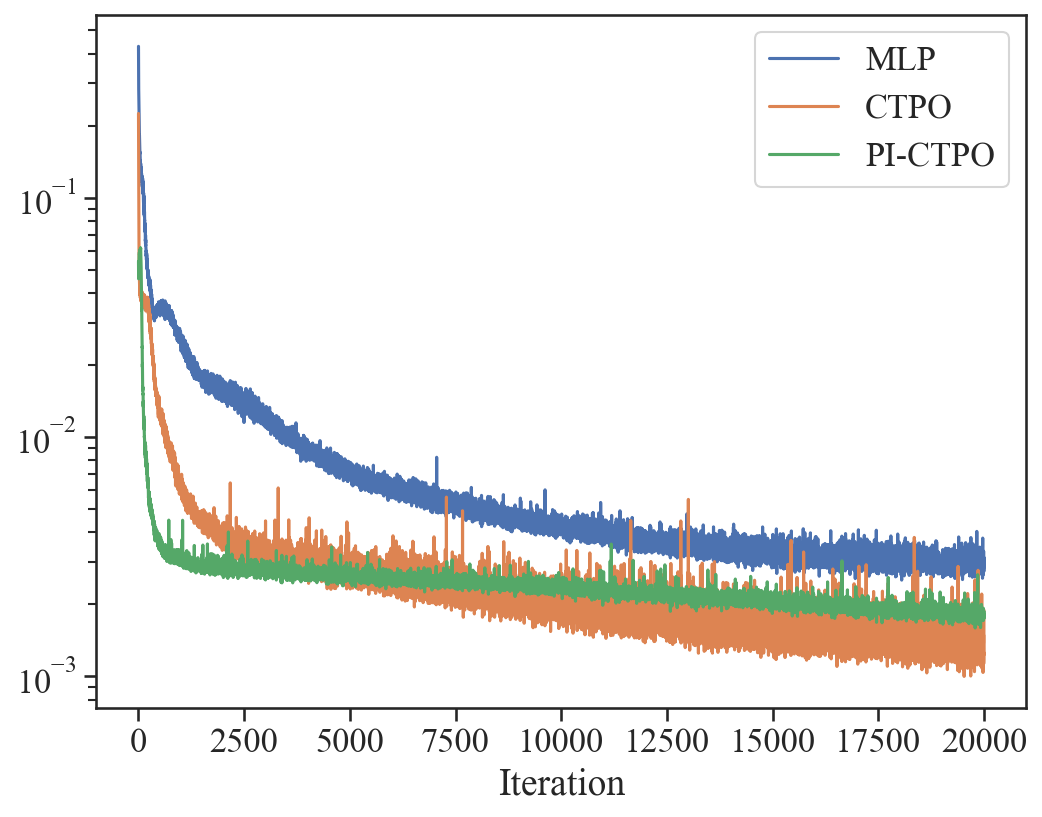

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
## font scale
sns.set(font_scale=1.5)
## font style
sns.set_style("ticks")
## times new roman
plt.rcParams["font.family"] = "Times New Roman"
fig, ax = plt.subplots(figsize=(8, 6), dpi=150)
alg_list = ['MLP', 'CTPO', 'PI-CTPO']
for i, df in enumerate(df_list):
    sns.lineplot(data=df, x="step", y="Max_error", ax=ax, label=alg_list[i], errorbar=("se", 2), ci=95)
ax.set_xlabel('Iteration')
ax.set_ylabel('')
## log scale
ax.set_yscale('log')
ax.legend()
## save figure
fig.savefig('max_error.png', bbox_inches='tight')

/tmp/ipykernel_1615453/298975004.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.lineplot(data=df, x="step", y="Mean_error", ax=ax, label=alg_list[i], errorbar=("se", 2), ci=95)
/tmp/ipykernel_1615453/298975004.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.lineplot(data=df, x="step", y="Mean_error", ax=ax, label=alg_list[i], errorbar=("se", 2), ci=95)
/tmp/ipykernel_1615453/298975004.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.lineplot(data=df, x="step", y="Mean_error", ax=ax, label=alg_list[i], errorbar=("se", 2), ci=95)


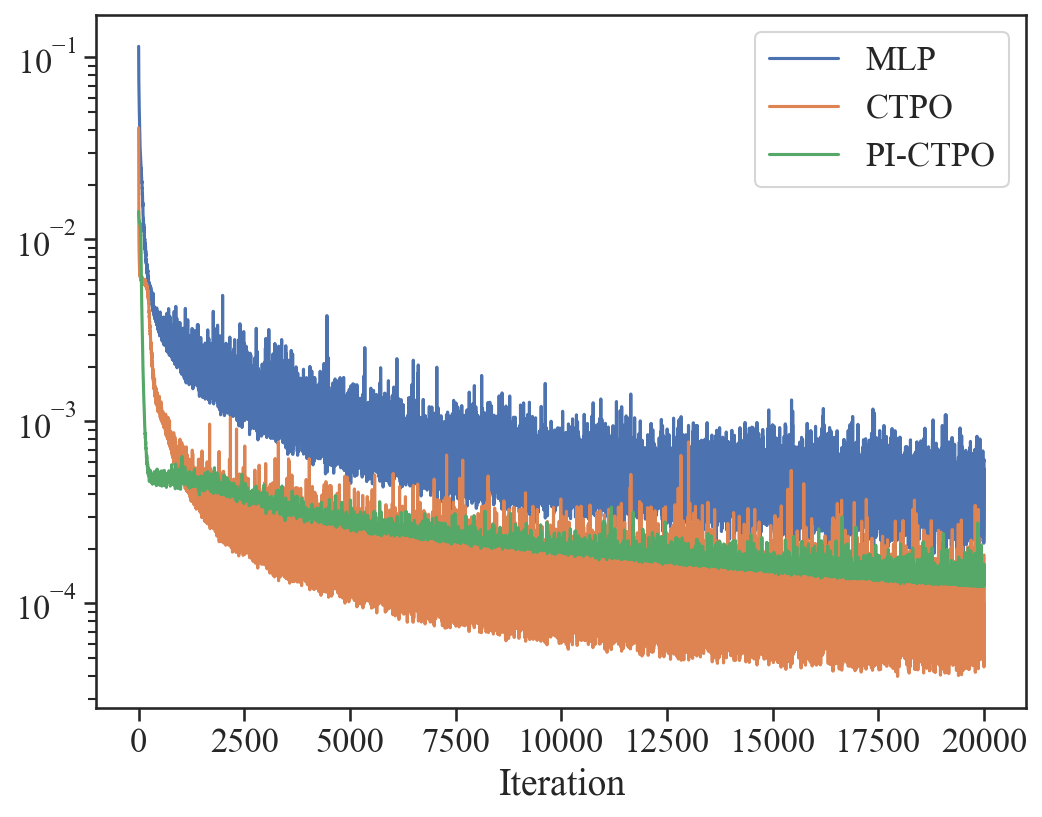

In [11]:
## font scale
sns.set(font_scale=1.5)
## font style
sns.set_style("ticks")
## times new roman
plt.rcParams["font.family"] = "Times New Roman"
fig, ax = plt.subplots(figsize=(8, 6), dpi=150)
alg_list = ['MLP', 'CTPO', 'PI-CTPO']
for i, df in enumerate(df_list):
    sns.lineplot(data=df, x="step", y="Mean_error", ax=ax, label=alg_list[i], errorbar=("se", 2), ci=95)
ax.set_xlabel('Iteration')
ax.set_ylabel('')
ax.set_yscale('log')
ax.legend()
## save figure
fig.savefig('mean_error.png', bbox_inches='tight')